In [1]:
# matlotlib inline plotting
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np

from six.moves import cPickle as pickle
from scipy import ndimage
from PIL import Image
import os
import sys
import matplotlib.pyplot as plt

from tf_model import Model

In [3]:
try:
    with open('tensorflow_predict_data.pickle', 'rb') as f:
        dataset = pickle.load(f)
        imDataset = dataset['toPredict']['data'].reshape(-1, 32, 32, 1)

except Exception as e:
    print('Unable to load data to',  'tensorflow_predict_data.pickle' + '.pickle', ':', e)
    raise

In [65]:
nImages = 10

imSamples = np.sort(np.random.randint(0, imDataset.shape[0], size=nImages))

In [66]:
model = Model(nImages)

In [67]:
model.predict(imDataset[imSamples])
test_prediction = model.test_prediction

INFO:tensorflow:Restoring parameters from SVHN_MODEL.ckpt


#### check predictions out

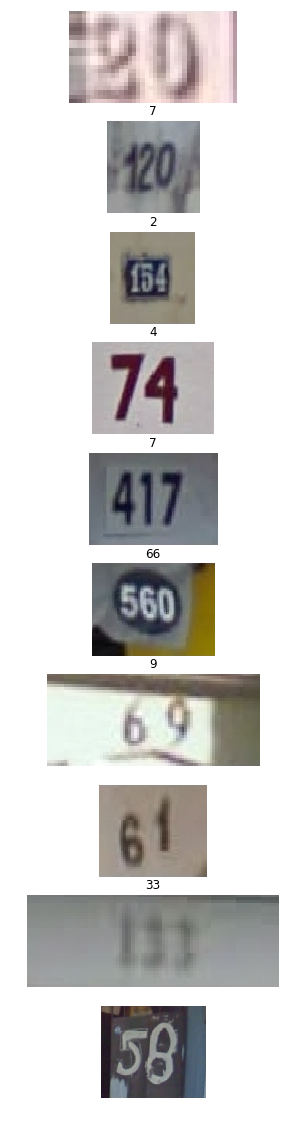

In [68]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)

f, ax = plt.subplots(nrows=nImages, ncols=1)

for i, j in enumerate(imSamples):
    
    filename = str(j+1) + '.png'
    fullname = os.path.join('extra', filename)
    
    im = Image.open(fullname)
    
    house_num = ''
    
    digits = test_prediction[i][test_prediction[i] < 10].astype(int)
    for k in digits:
        house_num += str(k)
        
    ax[i].axis('off')
    ax[i].set_title(house_num, loc='center')
    ax[i].imshow(im)